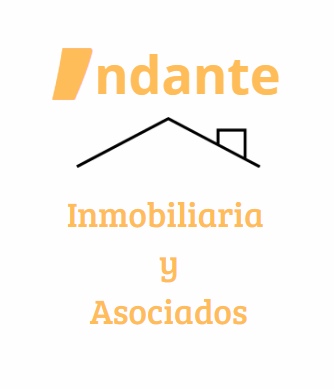

El presente análisis pretende mostrar las variables que más afectan al precio de la vivienda. Inicialmente se realizará una visión generalizada de los datos disponibles, después se realizará la limpieza de datos correspondiente para, finalmente, obtener un modelo de predicción lo más preciso posible.

Los datos utilizados proceden del siguiente link de Kaggle:  
https://www.kaggle.com/datasets/mirbektoktogaraev/madrid-real-estate-market

# 1- ANÁLISIS DE PRECIOS DE VIVIENDA

## 1. PREPARACIÓN DEL ENTORNO

### Importar librerias

In [54]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
import statsmodels.formula.api as smf

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Guardar modelo de predicción
#from sklearn.externals import joblib

### Cargar datos

In [55]:
# Carga de datos
data = pd.read_csv("/content/houses_Madrid1.csv")

### Visualización de datos principales

In [56]:
# Tamaño de datos
data.shape

(21742, 58)

In [57]:
# Primeros resultados
data.head()

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,...,D,False,NaN,NaN,NaN,NaN,False,True,False,False
1,1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,...,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
4,4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,True,True,True,True


In [58]:
# Últimos resultados
data.tail()

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
21737,21737,5,Ático en venta en Casco Histórico de Barajas,"Barajas, Madrid",78.0,NaN,2,2.0,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,NaN,NaN,NaN,NaN
21738,21738,4,Piso en venta en Urb. Campo de las Naciones - ...,"Barajas, Madrid",96.0,83.0,2,2.0,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,False,True,True,True
21739,21739,3,Piso en venta en Campo de las Naciones-Corralejos,"Barajas, Madrid",175.0,NaN,4,2.0,NaN,NaN,...,E,True,NaN,NaN,True,0.0,NaN,NaN,NaN,NaN
21740,21740,2,"Chalet adosado en venta en calle Burriana, 12","Campo de las Naciones-Corralejos, Madrid",289.0,NaN,4,3.0,3.0,304.0,...,en trámite,True,NaN,NaN,True,0.0,False,False,True,False
21741,21741,1,"Piso en venta en calle San Epifanio, 9","Imperial, Madrid",72.0,NaN,2,2.0,NaN,NaN,...,A,True,NaN,NaN,True,0.0,NaN,NaN,NaN,NaN


In [59]:
# Columnas, nulos y tipo de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    21742 non-null  int64  
 1   id                            21742 non-null  int64  
 2   title                         21742 non-null  object 
 3   subtitle                      21742 non-null  object 
 4   sq_mt_built                   21616 non-null  float64
 5   sq_mt_useful                  8228 non-null   float64
 6   n_rooms                       21742 non-null  int64  
 7   n_bathrooms                   21726 non-null  float64
 8   n_floors                      1437 non-null   float64
 9   sq_mt_allotment               1432 non-null   float64
 10  latitude                      0 non-null      float64
 11  longitude                     0 non-null      float64
 12  raw_address                   16277 non-null  object 
 13  i

In [60]:
# Valores estadísticos
data.describe()

,Unnamed: 0,id,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,...,rent_price_by_area,buy_price,buy_price_by_area,built_year,are_pets_allowed,is_furnished,is_kitchen_equipped,has_private_parking,has_public_parking,parking_price
count,21742.000000,21742.000000,21616.000000,8228.000000,21742.000000,21726.000000,1437.000000,1432.000000,0.0,0.0,...,0.0,2.174200e+04,21742.000000,10000.000000,0.0,0.0,0.0,0.0,0.0,7719.000000
mean,10870.500000,10871.500000,146.920892,103.458192,3.005749,2.091687,3.128740,241.692737,NaN,NaN,...,NaN,6.537356e+05,4020.523871,1970.046400,NaN,NaN,NaN,NaN,NaN,2658.000518
std,6276.519112,6276.519112,134.181865,88.259192,1.510497,1.406992,0.907713,247.484853,NaN,NaN,...,NaN,7.820821e+05,1908.418774,69.386705,NaN,NaN,NaN,NaN,NaN,13360.966258
min,0.000000,1.000000,13.000000,1.000000,0.000000,1.000000,1.000000,1.000000,NaN,NaN,...,NaN,3.600000e+04,447.000000,1723.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,5435.250000,5436.250000,70.000000,59.000000,2.000000,1.000000,2.000000,2.000000,NaN,NaN,...,NaN,1.980000e+05,2551.000000,1957.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,10870.500000,10871.500000,100.000000,79.000000,3.000000,2.000000,3.000000,232.000000,NaN,NaN,...,NaN,3.750000e+05,3720.000000,1970.000000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,16305.750000,16306.750000,162.000000,113.000000,4.000000,2.000000,4.000000,354.000000,NaN,NaN,...,NaN,7.636000e+05,5000.000000,1994.000000,NaN,NaN,NaN,NaN,NaN,0.000000
max,21741.000000,21742.000000,999.000000,998.000000,24.000000,16.000000,7.000000,997.000000,NaN,NaN,...,NaN,8.800000e+06,18889.000000,8170.000000,NaN,NaN,NaN,NaN,NaN,600000.000000


## 2. LIMPIEZA DE LOS DATOS

### 1. Comprobar duplicados

In [61]:
# Comprobar si hay valores duplicados
duplicados_columnas = data.duplicated(subset='id')
duplicados_columnas

0        False
1        False
2        False
3        False
4        False
         ...  
21737    False
21738    False
21739    False
21740    False
21741    False
Length: 21742, dtype: bool

En el dataset no hay filas duplicadas, por lo que todos los registros son únicos.

### 2. Comprobar nulos

In [62]:
# Comprobar porcentaje de nulos por columna
columnas_con_nulos = [i for i in data.columns if data[i].isnull().sum() > 0]
for col in columnas_con_nulos:
    print(col, (data[col].isnull().sum() / duplicados_columnas.count() * 100).round(2), '% de nulos')

sq_mt_built 0.58 % de nulos
sq_mt_useful 62.16 % de nulos
n_bathrooms 0.07 % de nulos
n_floors 93.39 % de nulos
sq_mt_allotment 93.41 % de nulos
latitude 100.0 % de nulos
longitude 100.0 % de nulos
raw_address 25.14 % de nulos
street_name 27.16 % de nulos
street_number 71.02 % de nulos
portal 100.0 % de nulos
floor 11.99 % de nulos
is_floor_under 5.38 % de nulos
door 100.0 % de nulos
rent_price_by_area 100.0 % de nulos
house_type_id 1.8 % de nulos
is_new_development 4.56 % de nulos
built_year 54.01 % de nulos
has_central_heating 37.41 % de nulos
has_individual_heating 37.41 % de nulos
are_pets_allowed 100.0 % de nulos
has_ac 48.44 % de nulos
has_fitted_wardrobes 38.37 % de nulos
has_lift 10.97 % de nulos
is_exterior 14.0 % de nulos
has_garden 92.84 % de nulos
has_pool 76.22 % de nulos
has_terrace 56.08 % de nulos
has_balcony 84.73 % de nulos
has_storage_room 64.59 % de nulos
is_furnished 100.0 % de nulos
is_kitchen_equipped 100.0 % de nulos
is_accessible 81.26 % de nulos
has_green_zone

Como vemos, tenemos columnas con varios registros faltantes. En el siguiente apartado trataremos éstas columnas.

### 3. Tratamiento de columnas con nulos.

Para la correción de las columnas, vamos a seguir los siguientes criterios:

*** Columnas con todo nulos:** Eliminación del dataset ya que no aportan nada de información.  
*** Columnas irrelevantes:** Eliminación del dataset por aportar información redundante o poco relevante para el análisis.  
*** Columnas con datos faltantes:** Se completarán los datos faltantes con diferentes criterios que se explicarán en cada una de las variables.

### Eliminar columnas con el 100% de nulos:

In [63]:
# Eliminar columnas sin datos
data = data.drop(
    columns = ['sq_mt_useful','n_floors','sq_mt_allotment','latitude',
               'longitude','raw_address', 'street_number', 'street_name',
               'portal', 'door','rent_price_by_area','house_type_id',
               'has_central_heating','has_individual_heating','are_pets_allowed',
               'has_fitted_wardrobes','has_garden','is_furnished',
               'is_kitchen_equipped','has_private_parking','has_public_parking',
               'is_parking_included_in_price', 'parking_price','is_orientation_north',
               'is_orientation_west','is_orientation_south','is_orientation_east']
)

### Eliminar columnas irrelevantes:

In [64]:
# Eliminar colummnas irrelevantes
data = data.drop(
    columns = ['Unnamed: 0','id','is_exact_address_hidden',
               'is_floor_under','neighborhood_id','operation',
               'rent_price','is_rent_price_known', 'buy_price_by_area',
               'is_buy_price_known','is_exterior','energy_certificate']
    )

### Tratar columnas con datos faltantes

En este apartado vamos a completar y ajustar las columnas que consideramos más relevantes para el análisis, que son las siguientes 18:

In [65]:
# Visualizar columnas actuales
data.columns

Index(['title', 'subtitle', 'sq_mt_built', 'n_rooms', 'n_bathrooms', 'floor',
       'buy_price', 'is_renewal_needed', 'is_new_development', 'built_year',
       'has_ac', 'has_lift', 'has_pool', 'has_terrace', 'has_balcony',
       'has_storage_room', 'is_accessible', 'has_green_zones', 'has_parking'],
      dtype='object')

#### Número de baños (n_bathrooms)

Tras analizar los datos de esta columna, llegamos a la conclusión de que las viviendas siguen el criterio de tener los mismos baños que habitaciones menos 1, salvo que sólo tengan una habitación o ninguna (caso de los estudios), tienen un baño igualmente. Es por eso que seguiremos este criterio para completar esta columna.

In [66]:
# Valores actuales de los baños
data["n_bathrooms"].unique()

array([ 1.,  2.,  3.,  4.,  6., nan,  5., 14.,  7.,  9.,  8., 10., 13.,
       12., 15., 11., 16.])

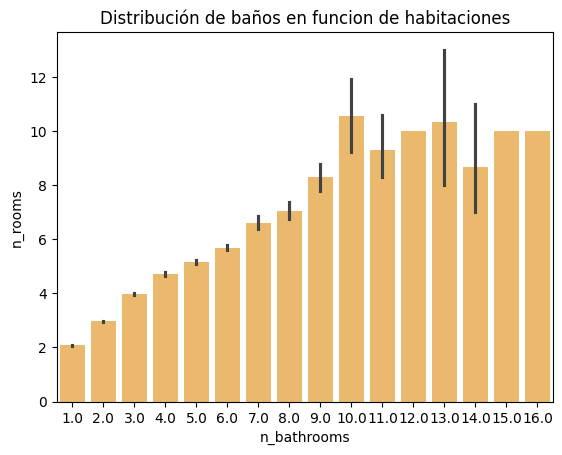

In [67]:
# Graficamos para visualizar mejor la relación entre baños y habitaciones
sns.barplot(data = data, x= 'n_bathrooms', y= 'n_rooms', color="#FFBD59")
plt.title('Distribución de baños en funcion de habitaciones')
plt.xlabel('n_bathrooms')
plt.ylabel('n_rooms')
plt.show()

In [68]:
# Función para rellenar datos según el criterio indicado
def fill_bathrooms(row):
    if pd.isnull(row['n_bathrooms']):
        if (row['n_rooms'] == 1) | (row['n_rooms'] == 0):
            return 1
        else:
            return row['n_rooms'] - 1
    return row['n_bathrooms']

In [69]:
# Aplicar función a los datos
data['n_bathrooms'] = data.apply(fill_bathrooms, axis=1)

In [70]:
# Convertir valores a entero
data['n_bathrooms'] = data['n_bathrooms'].round().astype(int)

In [71]:
# Comprobar los valores actuales
data['n_bathrooms'].unique()

array([ 1,  2,  3,  4,  6,  5, 14,  7,  9,  8, 10, 13, 12, 15, 11, 16])

#### Altura de pisos (floor)

Esta variable tiene múltiples valores, por lo que trataremos de englobar todos ellos en 3 tipos (0, 1, 2) pra facilitar el tratamiento del mismo.

In [72]:
# Valores actuales de la altura de los pisos
data['floor'].unique()

array(['3', '4', '1', 'Bajo', '2', nan, '7', '6', 'Semi-sótano', '5',
       'Entreplanta exterior', '8', '9', 'Entreplanta interior',
       'Entreplanta', 'Semi-sótano exterior', 'Sótano interior',
       'Semi-sótano interior', 'Sótano', 'Sótano exterior'], dtype=object)

In [73]:
# Mapeo para convertir los valores en los indicados anteriormente
data["floor"] = data["floor"].map(
        {
        'Bajo': 0,
        'Entreplanta':0,
        'Entreplanta exterior': 0,
        'Entreplanta interior': 0,
        'Semi-sótano': 0,
        'Semi-sótano exterior': 0,
        'Semi-sótano interior': 0,
        'Sótano': 0,
        'Sótano exterior': 0,
        'Sótano interior': 0,
        '3': 1,
        '4': 2,
        '1': 1,
        '2': 1,
        '7':2,
        '6': 2,
        '5': 2,
        '9':2,
        '8': 2,
        'nan' : 'NaN'
    }
)

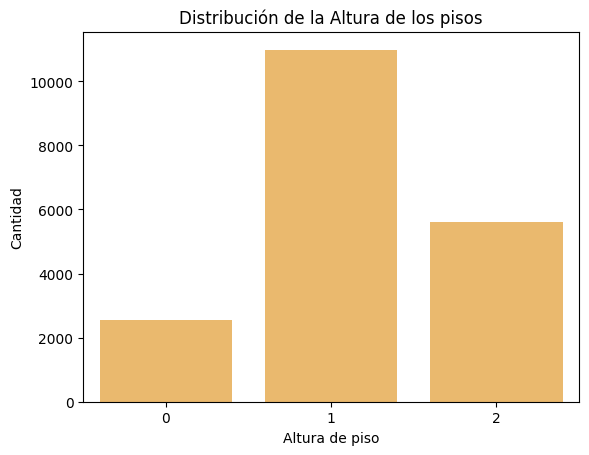

In [74]:
# Visualizamos los datos actuales
sns.countplot(data = data, x= 'floor', color="#FFBD59")
plt.title('Distribución de la Altura de los pisos')
plt.xlabel('Altura de piso')
plt.ylabel('Cantidad')
plt.show()

Tras haber realizado esta conversión, ahora toca rellenar los valores faltantes. En esta variable, el criterio a utilizar será el de la mediana, ya que consideramos que es la mejor forma que no distorsione los datos con respecto a los que sí disponemos.

In [75]:
# Calcular mediana
median_floor_by_subtitle = data.groupby('subtitle')['floor'].median()

In [76]:
# Función para rellenar los valores faltantes con la mediana
def fill_na_with_median(row):
    if pd.isna(row['floor']):
        return median_floor_by_subtitle[row['subtitle']]
    else:
        return row['floor']

In [77]:
# Aplicar la función
data['floor'] = data.apply(fill_na_with_median, axis=1)

In [78]:
# Convertir valor a entero
data['floor'] = data['floor'].round().astype(int)

#### Ascensor (has_lift)

Esta variable vamos a completarla según la media de cada zona, para tratar de representar los mejor posible los datos reales.

In [79]:
# Comprobar los valores únicos
data["has_lift"].unique()

array([False, True, nan], dtype=object)

In [80]:
# Calcular la media agrupada por zona
proporcion_con_ascensor = data.groupby(
    'subtitle')['has_lift'].mean()

# Filtrar el valor para completar
zona_a_valor = proporcion_con_ascensor > 0.5

In [81]:
# Aplicar función para completar valores
data['has_lift'] = data.apply(
    lambda row: zona_a_valor[row['subtitle']]
        if pd.isna(row['has_lift'])
        else row['has_lift'], axis=1
)

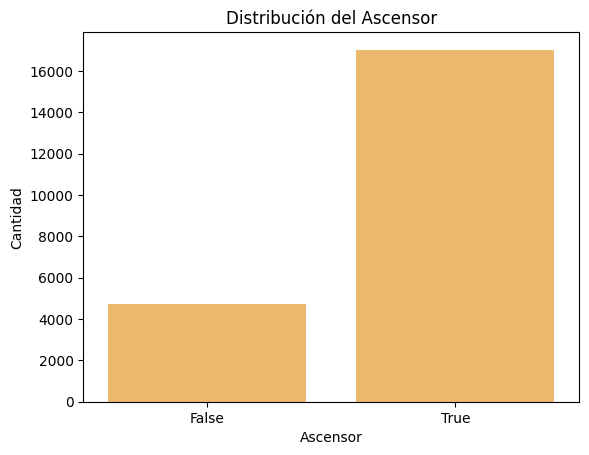

In [82]:
# Visualizar los datos
sns.countplot(data = data, x = 'has_lift', color="#FFBD59")
plt.title('Distribución del Ascensor')
plt.xlabel('Ascensor')
plt.ylabel('Cantidad')
plt.show()

#### Variables secundarias: Tiene piscina (has_pool), tiene terraza (has_terrace), tiene balcón (has_balcony), tiene trastero (has_storage_room), accesibilidad (is_accessible), zons verdes (has_green_zones) y aire acondicionado (has_ac)

Estas columnas vienen únicamente con el valor de true y nan, por lo que asumimos que los datos faltantes corresponden a false, esto es, que no lo incluyen.

In [83]:
# Comprobación de datos actuales
data["has_pool"].unique()

array([nan, True], dtype=object)

In [84]:
# Completar datos faltantes con false
data[['has_pool', 'has_terrace', 'has_balcony', 'has_storage_room', 'is_accessible', 'has_green_zones', 'has_ac']] = data[
['has_pool', 'has_terrace', 'has_balcony', 'has_storage_room', 'is_accessible', 'has_green_zones', 'has_ac']].fillna(False)

#### Año de construcción (built_year)

El criterio a utilizar en esta variable será el de la moda.

In [85]:
# Calcular moda
moda_año_construccion = data['built_year'].mode()[0]

In [86]:
# Rellenar los datos faltantes con la moda
data['built_year'].fillna(moda_año_construccion, inplace=True)

In [87]:
# Convertir valor a entero
data['built_year'] = data['built_year'].round().astype(int)

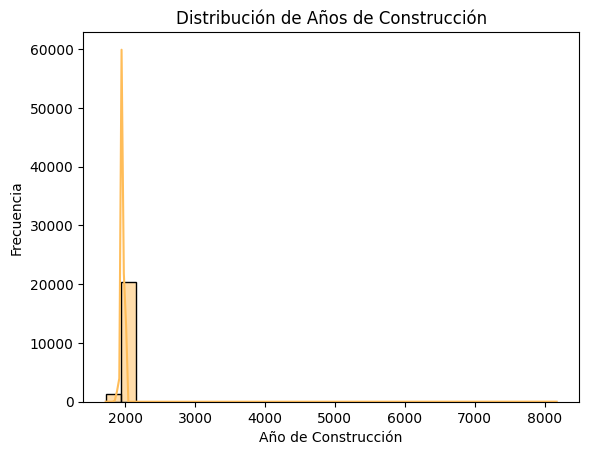

In [88]:
# Visualizar los datos
sns.histplot(data=data, x='built_year', bins=30, kde=True, color="#FFBD59")
plt.title('Distribución de Años de Construcción')
plt.xlabel('Año de Construcción')
plt.ylabel('Frecuencia')
plt.show()

#### Nueva construcción (is_new_development)

Oficialmente, una vivienda se considera de nueva construcción cuando tiene menos de 10 años, por lo que este será el criterio a seguir para completar los datos faltantes respecto a 2024.

In [89]:
# Función para rellenar los datos según el criterio indicado
data['is_new_development'] = data.apply(
    lambda row: True if pd.notna(row['built_year']) and 2014 <= row['built_year'] <= 2024 else
                False if pd.notna(row['built_year']) and row['built_year'] < 2014 else
                row['is_new_development'],
    axis=1
)

#### Tipo de vivienda (title)

Debido a la variedad del tipo de viviendas que existen y la disparidad de características que presentan entre ellas, hemos decidido quedarnos únicamente con los pisos y estudios, ya que los cosideramos los más uniformes para el análisis.

In [90]:
# Ver valores actuales
data['title'].unique()

array(['Piso en venta en calle de Godella, 64',
       'Piso en venta en calle de la del Manojo de Rosas',
       'Piso en venta en calle del Talco, 68', ...,
       'Piso en venta en Urb. Campo de las Naciones - Corralejos, Campo de las Naciones-Corralejos',
       'Piso en venta en Campo de las Naciones-Corralejos',
       ' Chalet adosado en venta en calle Burriana, 12'], dtype=object)

In [91]:
# Seleccionar únicamente los valores de piso y estudio
data = data[data['title'].str.contains('Piso|Estudio', case=False, na=False)]

In [92]:
# Una vez filtrados los datos, borramos la columna
data = data.drop(
    columns = ['title']
)

#### Descripción de la zona (subtitle)

De esta columna nos quedaremos sólo con el distrito, que es el dato que nos interesa para el análisis.

In [93]:
# Separar en dos columnas, por zona o ciudad
data_dividido = data['subtitle'].str.split(',', expand=True)

In [94]:
# Nombramos las nuevas columnas
data_dividido.columns = ['zona', 'ciudad']

In [95]:
# Sustituimos la nueva columna en el dataset
data['subtitle'] = data_dividido['zona']

In [96]:
# Renombrar nueva columna como zona
data = data.rename(columns={'subtitle': 'zona'})

Ahora, tras esta transformación, vamos a simplificar los diferentes datos de las zonas por distritos, para reducir el número de valores de la columna y así facilitar el análisis.

In [97]:
# Ver valores únicos
data['zona'].nunique()

146

In [98]:
# Mapear la columna zona con el número de distrito
data["zona"] = data["zona"].map(
     {
    'San Cristóbal': 17,
    'Los Ángeles': 17,
    'San Andrés': 17,
    'Los Rosales': 17,
    'Villaverde': 17,
    'Butarque': 17,
    'Vicálvaro': 19,
    'Ambroz': 19,
    'Casco Histórico de Vicálvaro': 19,
    'El Cañaveral - Los Berrocales': 19,
    'Valdebernardo - Valderribas': 19,
    'Casco Histórico de Vallecas': 18,
    'Villa de Vallecas': 18,
    'Ensanche de Vallecas - La Gavia': 18,
    'Santa Eugenia': 18,
    'Orcasitas': 12,
    'Usera': 12,
    'San Fermín': 12,
    'Pradolongo': 12,
    'Zofío': 12,
    'Almendrales': 12,
    'Moscardó': 12,
    '12 de Octubre-Orcasur': 12,
    'Tetuán': 6,
    'Valdeacederas': 6,
    'Berruguete': 6,
    'Cuatro Caminos': 6,
    'Cuzco-Castillejos': 6,
    'Bellas Vistas': 6,
    'Ventilla-Almenara': 6,
    'Retiro': 3,
    'Adelfas': 3,
    'Ibiza': 3,
    'Pacífico': 3,
    'Niño Jesús': 3,
    'Jerónimos': 3,
    'Estrella': 3,
    'Puente de Vallecas': 13,
    'Palomeras Bajas': 13,
    'San Diego': 13,
    'Palomeras sureste': 13,
    'Numancia': 13,
    'Entrevías': 13,
    'Portazgo': 13,
    'Aravaca': 9,
    'Argüelles': 9,
    'Valdezarza': 9,
    'Moncloa': 9,
    'Ciudad Universitaria': 9,
    'Fontarrón': 14,
    'Moratalaz': 14,
    'Vinateros': 14,
    'Marroquina': 14,
    'Media Legua': 14,
    'Pavones': 14,
    'Horcajo': 14,
    'Puerta del Ángel': 10,
    'Latina': 10,
    'Los Cármenes': 10,
    'Aluche': 10,
    'Águilas': 10,
    'Lucero': 10,
    'Campamento': 10,
    'Cuatro Vientos': 10,
    'Valdemarín': 9,
    'Casa de Campo': 9,
    'El Plantío': 9,
    'Fuencarral': 8,
    'Las Tablas': 8,
    'La Paz': 8,
    'Peñagrande': 8,
    'Tres Olivos - Valverde': 8,
    'Montecarmelo': 8,
    'Pilar': 8,
    'Mirasierra': 8,
    'Arroyo del Fresno': 8,
    'Fuentelarreina': 8,
    'El Pardo': 8,
    'Sanchinarro': 16,
    'Hortaleza': 16,
    'Virgen del Cortijo - Manoteras': 16,
    'Valdebebas - Valdefuentes': 16,
    'Palomas': 16,
    'Pinar del Rey': 16,
    'Conde Orgaz-Piovera': 16,
    'Canillas': 16,
    'Apóstol Santiago': 16,
    'Chamberí':7,
    'Almagro':7,
    'Trafalgar':7,
    'Nuevos Ministerios-Ríos Rosas':7,
    'Vallehermoso':7,
    'Gaztambide':7,
    'Arapiles':7,
    'Ventas': 15,
    'Pueblo Nuevo': 15,
    'Atalaya': 15,
    'Quintana': 15,
    'San Juan Bautista': 15,
    'Costillares': 15,
    'Ciudad Lineal': 15,
    'Concepción': 15,
    'Colina': 15,
    'San Pascual': 15,
    'Chamartín': 5,
    'El Viso': 5,
    'Prosperidad': 5,
    'Nueva España': 5,
    'Castilla': 5,
    'Bernabéu-Hispanoamérica': 5,
    'Ciudad Jardín': 5,
    'Lavapiés-Embajadores': 1,
    'Opañel': 11,
    'Comillas': 11,
    'Abrantes': 11,
    'San Isidro': 11,
    'Carabanchel': 11,
    'Puerta Bonita': 11,
    'Vista Alegre': 11,
    'Pau de Carabanchel': 11,
    'Buena Vista': 11,
    'Huertas-Cortes': 1,
    'Malasaña-Universidad': 1,
    'Chueca-Justicia': 1,
    'Palacio': 1,
    'Centro': 1,
    'Sol': 1,
    'Barrio de Salamanca': 4,
    'Goya': 4,
    'Lista': 4,
    'Guindalera': 4,
    'Fuente del Berro': 4,
    'Castellana': 4,
    'Recoletos': 4,
    'Imperial': 2,
    'Chopera': 2,
    'Acacias': 2,
    'Delicias': 2,
    'Palos de Moguer': 2,
    'Legazpi': 2,
    'Arganzuela': 2,
    'Casco Histórico de Barajas': 20,
    'Alameda de Osuna': 20,
    'Timón': 20,
    'Campo de las Naciones-Corralejos': 20,
    'Barajas': 20}
)

#### Renombrar columnas con las que me quedo

Por último, vamos renombrar todas las columnas para facilitar la comprensión:

In [99]:
# Renombrar columnas del dataset
data.rename(columns =
            {'zona':'zona',
             'sq_mt_built':'metros_cuadrados',
             'n_rooms':'numero_habitaciones',
             'n_bathrooms':'numero_baños',
             'floor':'altura_piso',
             'buy_price':'precio_venta',
            'is_renewal_needed':'necesita_reforma',
             'built_year':'año_construccion',
             'has_ac': 'aire_acondicionado',
             'has_lift': 'ascensor',
             'has_pool' : 'piscina',
             'has_terrace':'terraza',
             'has_balcony': 'balcon',
             'is_accessible':'accesibilidad',
             'has_green_zones':'zonas_verdes',
             'has_storage_room':'trastero',
             'has_parking':'parking',
             'is_new_development':'nueva_construccion'
            },
            inplace=True)

### Comprobación de la limpieza

Ya sólo queda comprobar como han quedado los datos tras la limpieza realizada.

In [100]:
# Visualizar primeros resultados
data.head()

,zona,metros_cuadrados,numero_habitaciones,numero_baños,altura_piso,precio_venta,necesita_reforma,nueva_construccion,año_construccion,aire_acondicionado,ascensor,piscina,terraza,balcon,trastero,accesibilidad,zonas_verdes,parking
0,17,64.0,2,1,1,85000,False,False,1960,True,False,False,False,False,False,False,False,False
1,17,70.0,3,1,2,129900,True,False,1960,False,True,False,True,False,False,False,False,False
2,17,94.0,2,2,1,144247,False,False,1960,False,True,False,False,False,True,False,False,False
3,17,64.0,2,1,0,109900,False,False,1955,False,True,False,False,False,True,True,False,False
4,17,108.0,2,2,2,260000,False,False,2003,True,True,True,False,False,True,False,True,True


In [101]:
# Comprobar tamaño
data.shape

(18093, 18)

In [102]:
# Comprobar tipo de datos y nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18093 entries, 0 to 21741
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   zona                 18093 non-null  int64  
 1   metros_cuadrados     18093 non-null  float64
 2   numero_habitaciones  18093 non-null  int64  
 3   numero_baños         18093 non-null  int64  
 4   altura_piso          18093 non-null  int64  
 5   precio_venta         18093 non-null  int64  
 6   necesita_reforma     18093 non-null  bool   
 7   nueva_construccion   18093 non-null  bool   
 8   año_construccion     18093 non-null  int64  
 9   aire_acondicionado   18093 non-null  bool   
 10  ascensor             18093 non-null  bool   
 11  piscina              18093 non-null  bool   
 12  terraza              18093 non-null  bool   
 13  balcon               18093 non-null  bool   
 14  trastero             18093 non-null  bool   
 15  accesibilidad        18093 non-null  bool

Hasta aquí llega la parte de la limpieza de los datos. En el siguiente apartado comprobaremos si los criterios utilizados nos proporcionan un modelo de predicción útil para predecir precios de vivienda.

In [103]:
# Descargar datos limpios en formato csv
#data.to_csv('excel_limpio_csv.csv', index = False)

# 2- PREDICCIÓN

En este apartado vamos a tratar de realizar un modelo de predicción en base al análisis realizado previamente. Por un lado, un Árbol de Decisión con todas las columnas, y por otro un análisis de VIF y modelo de Regresión Lineal con dos tipos de librerías y diferentes combinaciones de columnas.  
Por último, compararemos ambos modelos y nos quedaremos el que muestre mejores resultados.

### ÁRBOL DE DECISIÓN

In [104]:
# Selección de columnas de X e y
X = data.loc[:,data.columns != 'precio_venta']
y = data.loc[:,'precio_venta']

In [105]:
# Preparación de los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    train_size = 0.75,
    test_size = 0.25
)

In [106]:
# Creación de modelo, entrenamiento y predicción
decission_tree = DecisionTreeClassifier()
decission_tree.fit(X_train, y_train)
y_pred = decission_tree.predict(X_test)
score_tree = round(decission_tree.score(X_train, y_train) * 100, 2)
score_tree

96.93

### REGRESIÓN LINEAL

### Preparacion de la data para el modelo

#### Convertir columnas true/false en 1 y 0

In [107]:
# Convertir variables
columnas_true_false = data[['necesita_reforma','nueva_construccion','aire_acondicionado','ascensor','piscina','terraza','balcon','trastero','accesibilidad','zonas_verdes','parking']].astype(bool)
for column in columnas_true_false:
    data[column] = np.where(data[column], 1, 0)


#### Normalizacion

In [108]:
# Normalización de datos
df= data[['metros_cuadrados','numero_habitaciones','numero_baños','altura_piso','precio_venta']]
df_norm = (df-df.min()) / (df.max() - df.min())
df_norm

,metros_cuadrados,numero_habitaciones,numero_baños,altura_piso,precio_venta
0,0.057889,0.133333,0.000000,0.5,0.005789
1,0.064699,0.200000,0.000000,1.0,0.011094
2,0.091941,0.133333,0.076923,0.5,0.012789
3,0.057889,0.133333,0.000000,0.0,0.008731
4,0.107832,0.133333,0.076923,1.0,0.026465
...,...,...,...,...,...
21735,0.085131,0.133333,0.076923,0.5,0.038280
21736,0.097616,0.133333,0.076923,0.5,0.036980
21738,0.094211,0.133333,0.076923,0.5,0.045959
21739,0.183882,0.266667,0.076923,0.0,0.076087


#### Ver correlaciones

In [109]:
# Creación de matriz de correlación
correlation_matrix = data.corr().round(2)

In [110]:
# Filtro para coger las de mayor correlación
filtro = (data.corr()["precio_venta"]>0.2) | (data.corr()["precio_venta"]<-0.2)

In [111]:
# Nuevos datos con el filtro anterior
data_bis = data.loc[:,filtro]

In [112]:
# Ver datos disponibles
data_bis

,zona,metros_cuadrados,numero_habitaciones,numero_baños,precio_venta,ascensor,trastero,parking
0,17,64.0,2,1,85000,0,0,0
1,17,70.0,3,1,129900,1,0,0
2,17,94.0,2,2,144247,1,1,0
3,17,64.0,2,1,109900,1,1,0
4,17,108.0,2,2,260000,1,1,1
...,...,...,...,...,...,...,...,...
21735,20,88.0,2,2,360000,1,1,1
21736,20,99.0,2,2,349000,1,1,1
21738,20,96.0,2,2,425000,1,1,1
21739,20,175.0,4,2,680000,0,1,1


### Separar en train y test

In [113]:
# Preparación de X e y
X = data.loc[:,data.columns != 'precio_venta']
y = data.loc[:,'precio_venta']

In [114]:
# Separar datos en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    train_size = 0.75,
    test_size = 0.25
)

In [115]:
# Ver tamaño de los datos
X_train.size, y_train.size, y_train.size, y_test.size

(230673, 13569, 13569, 4524)

In [116]:
# Imprimir valores
print(X_train.columns.values)

['zona' 'metros_cuadrados' 'numero_habitaciones' 'numero_baños'
 'altura_piso' 'necesita_reforma' 'nueva_construccion' 'año_construccion'
 'aire_acondicionado' 'ascensor' 'piscina' 'terraza' 'balcon' 'trastero'
 'accesibilidad' 'zonas_verdes' 'parking']


In [117]:
# Unir datos que nos interesan
concatenada = pd.concat([X_train,y_train], axis=1)

## Entrenar el modelo

#### --- Librería SMF

In [118]:
# Creación y entrenamiento del modelo
modelo = smf.ols(
    formula = "precio_venta ~ necesita_reforma + nueva_construccion + aire_acondicionado + ascensor + piscina + terraza + balcon + trastero + accesibilidad + zonas_verdes + parking + zona + metros_cuadrados + numero_habitaciones + numero_baños + altura_piso",
    data = concatenada
).fit()

In [119]:
# Filtro de columnas relevantes
col_relevantes = modelo.pvalues<0.05
col_relevantes

Intercept               True
necesita_reforma        True
nueva_construccion      True
aire_acondicionado      True
ascensor                True
piscina                False
terraza                 True
balcon                  True
trastero               False
accesibilidad           True
zonas_verdes            True
parking                False
zona                    True
metros_cuadrados        True
numero_habitaciones     True
numero_baños            True
altura_piso             True
dtype: bool

In [120]:
# Cálculo de R2
modelo.rsquared

0.8042019281776736

In [121]:
# Cálculo de R2 ajustado
modelo.rsquared_adj

0.8039707616229836

Analizar VIF de variables relevantes

In [122]:
# Selección de columnas relevantes
columnas = col_relevantes.index[col_relevantes.index != "Intercept"]
columnas

Index(['necesita_reforma', 'nueva_construccion', 'aire_acondicionado',
       'ascensor', 'piscina', 'terraza', 'balcon', 'trastero', 'accesibilidad',
       'zonas_verdes', 'parking', 'zona', 'metros_cuadrados',
       'numero_habitaciones', 'numero_baños', 'altura_piso'],
      dtype='object')

In [123]:
# Mostrar columnas relevantes
X_train.columns

Index(['zona', 'metros_cuadrados', 'numero_habitaciones', 'numero_baños',
       'altura_piso', 'necesita_reforma', 'nueva_construccion',
       'año_construccion', 'aire_acondicionado', 'ascensor', 'piscina',
       'terraza', 'balcon', 'trastero', 'accesibilidad', 'zonas_verdes',
       'parking'],
      dtype='object')

#### Calcular VIF

In [124]:
# Calcular VIF de las variables
vif_acum = {}

for i in columnas:

    x = X_train.loc[:,X_train.columns != i]
    y = X_train.loc[:,i]

    lm = LinearRegression()
    lm.fit(x, y)
    r2 = lm.score(x, y)

    vif = (1/(1-r2))
    vif_acum[i] = vif

vif_acum

{'necesita_reforma': 1.1659416733753072,
 'nueva_construccion': 1.043832538374863,
 'aire_acondicionado': 1.1612470097896097,
 'ascensor': 1.3665073731966928,
 'piscina': 1.909194387491967,
 'terraza': 1.1101004928278289,
 'balcon': 1.058185523401709,
 'trastero': 1.4054853368499596,
 'accesibilidad': 1.1164801909742599,
 'zonas_verdes': 1.6661174266779684,
 'parking': 1.7086758640151134,
 'zona': 1.341249815812489,
 'metros_cuadrados': 3.6432180050421312,
 'numero_habitaciones': 2.2474070700315663,
 'numero_baños': 3.317216209201523,
 'altura_piso': 1.0871266231120933}

### Probar a quitar variables para encontrar el modelo más óptimo

In [125]:
# Crear y entrenar nuevo modelo
modelo = smf.ols(
    formula = "precio_venta ~ necesita_reforma + aire_acondicionado + ascensor + piscina + terraza + balcon + trastero + accesibilidad + zonas_verdes + parking + zona + metros_cuadrados + numero_habitaciones + numero_baños + altura_piso",
    data = concatenada
).fit()

In [126]:
# Visualizar su R2 ajustado
modelo.rsquared_adj

0.8037229066216736

In [127]:
# Crear y entrenar nuevo modelo
modelo = smf.ols(
    formula = "precio_venta ~ ascensor + piscina + terraza + balcon + trastero + accesibilidad + zonas_verdes + parking + zona + metros_cuadrados + numero_habitaciones + numero_baños + altura_piso",
    data = concatenada
).fit()

In [128]:
# Ver su R2 ajustado
modelo.rsquared_adj

0.8030855453871306

In [129]:
# Crear y entrenar el nuevo modelo
modelo = smf.ols(
    formula = "precio_venta ~ ascensor + piscina + terraza + zona + metros_cuadrados + numero_habitaciones + numero_baños",
    data = concatenada
).fit()

In [130]:
# Ver su R2 ajustado
modelo.rsquared_adj

0.7991353165735946

### -- Librería LinearRegression

In [131]:
# Crear y entrenar modelo con todas las variables
modelo = LinearRegression()
modelo.fit(X_train, y_train)
modelo.score(X_test.loc[:,X_train.columns], y_test)

0.7972095889159904

In [132]:
# Crear y entrenar modelo con otras variables
X_train = X_train.loc[:,['ascensor','piscina','zonas_verdes','zona','metros_cuadrados','numero_habitaciones','numero_baños','accesibilidad','balcon']]
X_test = X_test.loc[:,['ascensor','piscina','zonas_verdes','zona','metros_cuadrados','numero_habitaciones','numero_baños','accesibilidad','balcon']]
modelo = LinearRegression()
modelo.fit(X_train, y_train)
modelo.score(X_test.loc[:,X_train.columns], y_test)

0.7939590143402282

In [133]:
# Comprobar su R2 ajustado
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = 8
r2_ajustado = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print(f"R^2 ajustado: {r2_ajustado}")

R^2 ajustado: 0.7935939361818056


In [134]:
# Crear y entrenar modelo con otras variables
X_train = X_train.loc[:,['ascensor','piscina','zonas_verdes','zona','metros_cuadrados','numero_habitaciones','numero_baños','accesibilidad']]
X_test = X_test.loc[:,['ascensor','piscina','zonas_verdes','zona','metros_cuadrados','numero_habitaciones','numero_baños','accesibilidad']]
modelo = LinearRegression()
modelo.fit(X_train, y_train)
modelo.score(X_test.loc[:,X_train.columns], y_test)

0.7923019649437695

In [135]:
# Comprobar su R2 ajustado
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = 8
r2_ajustado = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print(f"R^2 ajustado: {r2_ajustado}")

R^2 ajustado: 0.791933950706682


In [136]:
# Crear y entrenar modelo con otras variables
X_train = X_train.loc[:,['ascensor','piscina','zonas_verdes','zona','metros_cuadrados','numero_habitaciones','numero_baños']]
X_test = X_test.loc[:,['ascensor','piscina','zonas_verdes','zona','metros_cuadrados','numero_habitaciones','numero_baños']]
modelo = LinearRegression()
modelo.fit(X_train, y_train)
modelo.score(X_test.loc[:,X_train.columns], y_test)

0.7914881957661586

In [137]:
# Comprobar su R2 ajustado
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = 7
r2_ajustado = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print(f"R^2 ajustado: {r2_ajustado}")

R^2 ajustado: 0.7911649932352381


In [138]:
# Crear y entrenar modelo con otras variables
X_train = X_train.loc[:,['ascensor','zonas_verdes','zona','metros_cuadrados','numero_habitaciones','numero_baños']]
X_test = X_test.loc[:,['ascensor','zonas_verdes','zona','metros_cuadrados','numero_habitaciones','numero_baños']]
modelo = LinearRegression()
modelo.fit(X_train, y_train)
modelo.score(X_test.loc[:,X_train.columns], y_test)

0.7913813567994923

In [139]:
# Comprobar su R2 ajustado
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = 6
r2_ajustado = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print(f"R^2 ajustado: {r2_ajustado}")

R^2 ajustado: 0.7911042454735673


In [140]:
# Crear y entrenar modelo con otras variables
X_train = X_train.loc[:,['ascensor','zona','metros_cuadrados','numero_habitaciones','numero_baños']]
X_test = X_test.loc[:,['ascensor','zona','metros_cuadrados','numero_habitaciones','numero_baños']]
modelo = LinearRegression()
modelo.fit(X_train, y_train)
modelo.score(X_test.loc[:,X_train.columns], y_test)

0.7893732713341522

In [141]:
# Comprobar su R2 ajustado
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = 5
r2_ajustado = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print(f"R^2 ajustado: {r2_ajustado}")

R^2 ajustado: 0.7891401740248718


In [142]:
# Valores de predicción
print(y_pred)

[105274.93330082 477478.18530408 524257.60052968 ... 661156.54179253
 559618.64167591 276050.09260687]


### Hacemos el ejemplo de una casa con accensor en el centro de 75m2 con 2 habitaciones y 1 baño

In [143]:
# Ejemplo de predicción
modelo.predict([[True,1,75,2,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([382607.33213008])

#### Guardar modelo para su posterior uso

In [144]:
# Guardar modelo
#joblib.dump(decission_tree, "modelo_final.pkl")